In [ ]:
%matplotlib notebook
!pip install ipympl
!pip install ipynb
%matplotlib widget
from ipywidgets import FloatSlider, IntSlider, interact, interact_manual
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import prince
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
df = pd.read_csv("maps-synthetic-data-v1.1.csv")
display(df)
prince.__file__

In [76]:
def dropthenMCAcoloured(thresholds):
    count = 0
    drop_list = ["Unnamed: 0","X","flag"]
    pct_list = []
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        pct_missing = round(pct_missing*100)
        pct_list.append(pct_missing)
        
        if pct_missing > thresholds:
            count = count + 1
            #dropped_df.drop(col, axis=1)
            drop_list.append(col)
    dropped_df = df.drop(columns = drop_list)     
    print('Total column drop is: ' + str(count))
    #print('Columns which has too many N/A: \n', drop_list)
    
    subset = dropped_df.iloc[:]
    #display(subset)
    before = subset.shape[0]
    subset = subset.dropna()
    after = subset.shape[0]
    percentagelost = (before-after)/before

    print("Num Rows Before: "+str(before))
    print("Num Rows After: "+str(after))
    print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%")

    groups = []
    for i in range(len(subset)):
        groups.append(str(dropped_df.iloc[subset.index[i]]['has_dep_diag']))
    
    
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(subset)
    ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),row_groups=groups,show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=False,column_points_size=50,show_column_labels=False,legend_n_cols=1)
    display(subset)
print("Threshhold must be over 67 to work")
interact_manual(dropthenMCAcoloured, thresholds=IntSlider(min=0, max=100))
    #sns.barplot(data = df, x = df.columns, y = pct_list, sort = False, ax=ax1)
    #ax2 = ax1.twinx()

interactive(children=(IntSlider(value=0, description='thresholds'), Button(description='Run Interact', style=B…

<function __main__.dropthenMCA(thresholds)>

In [81]:
def dropthenMCA(thresholds):
    count = 0
    drop_list = ["Unnamed: 0","X","flag"]
    pct_list = []
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        pct_missing = round(pct_missing*100)
        pct_list.append(pct_missing)
        
        if pct_missing > thresholds:
            count = count + 1
            #dropped_df.drop(col, axis=1)
            drop_list.append(col)
    dropped_df = df.drop(columns = drop_list)     
    print('Total column drop is: ' + str(count))
    #print('Columns which has too many N/A: \n', drop_list)
    
    subset = dropped_df.iloc[:]
    #display(subset)
    before = subset.shape[0]
    subset = subset.dropna()
    after = subset.shape[0]
    percentagelost = (before-after)/before

    print("Num Rows Before: "+str(before))
    print("Num Rows After: "+str(after))
    print("Percentage Rows Dropped: "+str(int(percentagelost*100))+"%") 
    
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(subset)
    ax = mca.plot_coordinates(X=subset,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=False,legend_n_cols=1)
    display(subset)
interact_manual(dropthenMCA, thresholds=IntSlider(min=0, max=100))
    #sns.barplot(data = df, x = df.columns, y = pct_list, sort = False, ax=ax1)
    #ax2 = ax1.twinx()

interactive(children=(IntSlider(value=0, description='thresholds'), Button(description='Run Interact', style=B…

<function __main__.dropthenMCA(thresholds)>

In [171]:
def immputethenMCAcoloured(thresholds):
    count = 0
    drop_list = ["Unnamed: 0","X","flag"]
    pct_list = []
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        pct_missing = round(pct_missing*100)
        pct_list.append(pct_missing)
        
        if pct_missing > thresholds:
            count = count + 1
            #dropped_df.drop(col, axis=1)
            drop_list.append(col)
    dropped_df = df.drop(columns = drop_list)     
    print('Total column drop is: ' + str(count))
    
    immpute_df = dropped_df.copy()
    for column in immpute_df:
        if immpute_df[column].isnull().any():
            immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])
    
    subset = immpute_df.iloc[:]
    groups = []
    for i in range(len(subset)):
        groups.append(str(immpute_df.iloc[subset.index[i]]['has_dep_diag']))        
            
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(immpute_df)
    ax = mca.plot_coordinates(X=immpute_df,row_groups=groups,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=70,show_column_labels=False,legend_n_cols=1)
    display(immpute_df)
    
print('threshold must be over 67%')
interact_manual(immputethenMCAcoloured, thresholds=IntSlider(min=0, max=100))
    #sns.barplot(data = df, x = df.columns, y = pct_list, sort = False, ax=ax1)
    #ax2 = ax1.twinx()

threshold must be over 67%


interactive(children=(IntSlider(value=0, description='thresholds'), Button(description='Run Interact', style=B…

<function __main__.immputethenMCAcoloured(thresholds)>

In [83]:
def immputethenMCA(thresholds):
    count = 0
    drop_list = ["Unnamed: 0","X","flag"]
    pct_list = []
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        pct_missing = round(pct_missing*100)
        pct_list.append(pct_missing)
        
        if pct_missing > thresholds:
            count = count + 1
            #dropped_df.drop(col, axis=1)
            drop_list.append(col)
    dropped_df = df.drop(columns = drop_list)     
    print('Total column drop is: ' + str(count))
    
    immpute_df = dropped_df.copy()
    for column in immpute_df:
        if immpute_df[column].isnull().any():
            immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])      
            
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(immpute_df)
    ax = mca.plot_coordinates(X=immpute_df,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=False,column_points_size=50,show_column_labels=False,legend_n_cols=2)
    display(immpute_df)
    
interact_manual(immputethenMCA, thresholds=IntSlider(min=0, max=100))
    #sns.barplot(data = df, x = df.columns, y = pct_list, sort = False, ax=ax1)
    #ax2 = ax1.twinx()

threshold must be over 67%


interactive(children=(IntSlider(value=0, description='thresholds'), Button(description='Run Interact', style=B…

<function __main__.immputethenMCA(thresholds)>

In [163]:
def testColOnDepVars(test_col):
    #depression_quantifiers = ["dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07","has_dep_diag","secd_diag","prim_diag","panic_score","dep_score","dep_thoughts"]
    #depression_quantifiers = ["dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07"]
    depression_quantifiers = ["has_dep_diag","secd_diag","prim_diag","panic_score","dep_score"]
    testcolumns = depression_quantifiers
    testcolumns.append(test_col)
    immpute_df = df[testcolumns]
    for column in immpute_df:
        if immpute_df[column].isnull().any():
            immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])      
    
    subset = immpute_df.iloc[:]
    groups = []
    for i in range(len(subset)):
        groups.append(str(immpute_df.iloc[subset.index[i]]['has_dep_diag'])) 
    
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(immpute_df)
    ax = mca.plot_coordinates(X=immpute_df,row_groups=groups,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=True,legend_n_cols=2)
    
interact_manual(testColOnDepVars ,test_col=df)


interactive(children=(Dropdown(description='test_col', options=('Unnamed: 0', 'X', 'flag', 'comp_bed_9', 'mat_…

<function __main__.testColOnDepVars(test_col)>

In [162]:
def testColOnScreenTimeVars(test_col):
    screen_quantifiers = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor"]
    testcolumns = screen_quantifiers
    testcolumns.append(test_col)
    immpute_df = df[testcolumns]
    hasdep_df = df['has_dep_diag'].fillna(df['has_dep_diag'].mode()[0])
    for column in immpute_df:
        if immpute_df[column].isnull().any():
            immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])      
    
    subset = immpute_df.iloc[:]
    groups = []
    for i in range(len(subset)):
        groups.append(str(hasdep_df.iloc[subset.index[i]])) 
    
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(immpute_df)
    ax = mca.plot_coordinates(X=immpute_df,row_groups=groups,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=False,legend_n_cols=2)
    
interact_manual(testColOnScreenTimeVars ,test_col=df)

interactive(children=(Dropdown(description='test_col', options=('Unnamed: 0', 'X', 'flag', 'comp_bed_9', 'mat_…

<function __main__.testColOnScreenTimeVars(test_col)>

In [128]:
def distancesAndInertia(screenordep):
    output = []
    quantifiers=[]
    if screenordep == "screen variables":
        quantifiers = ["talk_phon_week","talk_phon_wend","text_wend","comp_wend","talk_mob_week","tv_wend","text_week","talk_mob_wend","comp_week","tv_week","fam_tv_eve","fam_tv_aft","fam_tv_mor"]
    else:
        quantifiers = ["dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07","has_dep_diag","secd_diag","prim_diag","panic_score","dep_score","dep_thoughts"]
    print(quantifiers)
    for column in df.columns:
        if column not in quantifiers:
            testcolumns = quantifiers[:]
            testcolumns.append(column)
            immpute_df = df[testcolumns]

            for column in immpute_df:
                if immpute_df[column].isnull().any():
                    immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0]) 
                    
            mca = prince.MCA( n_components=2, n_iter=5, copy=True,check_input=True,engine='auto',random_state=42)
            mca = mca.fit(immpute_df)
            column_coordinates = mca.column_coordinates(immpute_df)
            column_distances = np.linalg.norm(column_coordinates,axis=1)

            total_inertia = (mca.explained_inertia_[0] + mca.explained_inertia_[1])*100
            #print("Total Inertia : "+str(total_inertia))
            intertias_list = []
            for i in range(len(column_distances)):
                intertias_list.append(total_inertia)

            zipped = list(zip(column_coordinates.index.values, column_distances,intertias_list))
            zipped = sorted(zipped, key = operator.itemgetter(1),reverse = True)
            for i in range(len(zipped)):
                if column in str(zipped[i][0]):
                    #print(zipped[i][0] + " Distance: " + str(zipped[i][1]) + "\n")
                    output.append(zipped[i])
    output = sorted(output, key = operator.itemgetter(1),reverse = True)
    output_np = np.array(output)
    meandistance = np.mean(output_np[:,1].astype(np.float))
    meaninertia = np.mean(output_np[:,2].astype(np.float))
    stddistance = np.std(output_np[:,1].astype(np.float))
    stdinertia = np.std(output_np[:,2].astype(np.float))
    columnames = []
    standadised_scores = []
    for i in range(len(output)):
        columnames.append(output[i][0])
        standadised_scores.append(((output[i][1] - meandistance )/stddistance)+((output[i][2] - meaninertia )/stdinertia))

    zipped = list(zip(columnames, standadised_scores))
    zipped = sorted(zipped, key = operator.itemgetter(1),reverse = True)
    for i in range(len(output)):
        print(str(i+1)+") "+zipped[i][0] + " : "+str(zipped[i][1]))
interact_manual(distancesAndInertia ,screenordep=["screen variables","depression variables"])

interactive(children=(Dropdown(description='screenordep', options=('screen variables', 'depression variables')…

<function __main__.distancesAndInertia(screenordep)>

<ipython-input-147-4f12d1cab6e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])


<IPython.core.display.Javascript object>


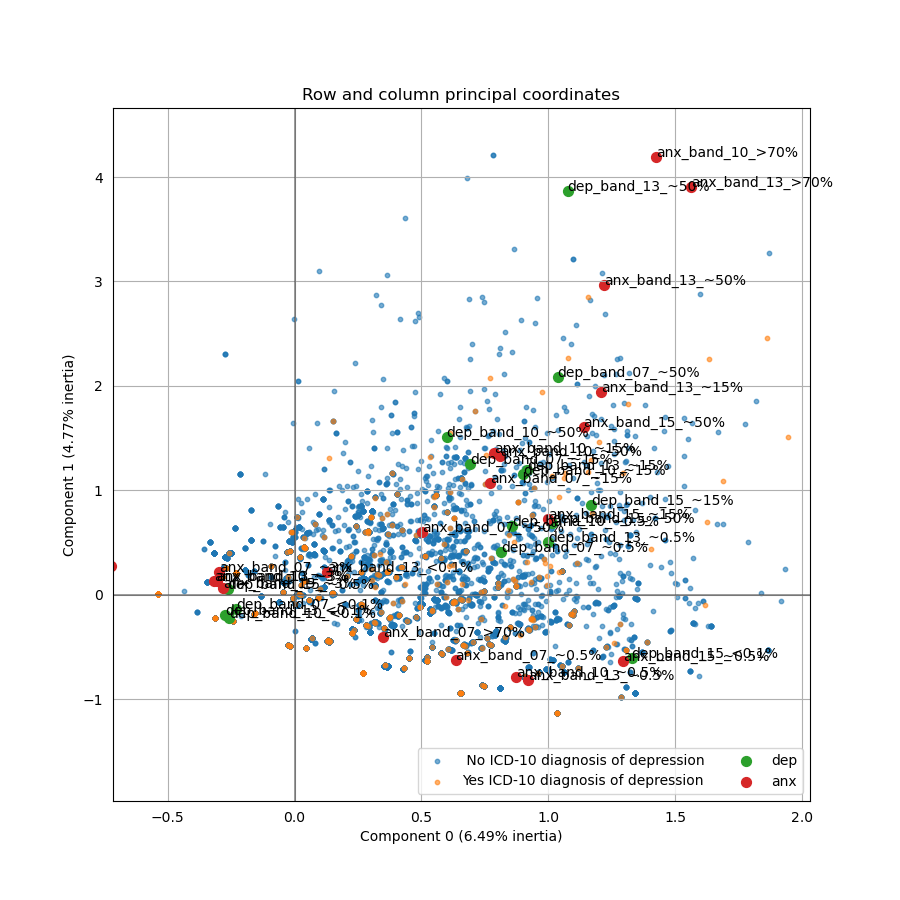

In [147]:
def depbandsvshasdep():
    depression_quantifiers = ["dep_band_15","dep_band_13","dep_band_10","dep_band_07","anx_band_15","anx_band_13","anx_band_10","anx_band_07"]
    testcolumns = depression_quantifiers
    immpute_df = df[testcolumns]
    for column in immpute_df:
        if immpute_df[column].isnull().any():
            immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])      
    
    subset = immpute_df.iloc[:]
    hasdep_df = df['has_dep_diag'].fillna(df['has_dep_diag'].mode()[0])
    groups = []
    for i in range(len(subset)):
        groups.append(str(hasdep_df.iloc[subset.index[i]]))
    
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(immpute_df)
    ax = mca.plot_coordinates(X=immpute_df,row_groups=groups,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=True,legend_n_cols=2)
depbandsvshasdep()

In [161]:
def otherdepvshasdep(test_col):
    depression_quantifiers = ["secd_diag","prim_diag","panic_score","dep_score","dep_thoughts"] # cant get rid of has_dep_diag for some reason
    testcolumns = depression_quantifiers
    testcolumns.append(test_col)
    immpute_df = df[testcolumns]
    for column in immpute_df:
        if immpute_df[column].isnull().any():
            immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])      
    
    subset = immpute_df.iloc[:]
    hasdep_df = df['has_dep_diag'].fillna(df['has_dep_diag'].mode()[0])
    groups = []
    for i in range(len(subset)):
        groups.append(str(hasdep_df.iloc[subset.index[i]]))
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(immpute_df)
    ax = mca.plot_coordinates(X=immpute_df,row_groups=groups,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=True,legend_n_cols=2)

interact_manual(otherdepvshasdep ,test_col=df)

interactive(children=(Dropdown(description='test_col', options=('Unnamed: 0', 'X', 'flag', 'comp_bed_9', 'mat_…

<function __main__.otherdepvshasdep(test_col)>

In [ ]:
def allvarsvshasdep(test_col):
    depression_quantifiers = ["secd_diag","prim_diag","panic_score","dep_score","dep_thoughts"] # cant get rid of has_dep_diag for some reason
    testcolumns = depression_quantifiers
    testcolumns.append(test_col)
    immpute_df = df[testcolumns]
    for column in immpute_df:
        if immpute_df[column].isnull().any():
            immpute_df[column]=immpute_df[column].fillna(immpute_df[column].mode()[0])      
    
    subset = immpute_df.iloc[:]
    hasdep_df = df['has_dep_diag'].fillna(df['has_dep_diag'].mode()[0])
    groups = []
    for i in range(len(subset)):
        groups.append(str(hasdep_df.iloc[subset.index[i]]))
    mca = prince.MCA( n_components=2, n_iter=3, copy=True,check_input=True,engine='auto',random_state=42)
    mca = mca.fit(immpute_df)
    ax = mca.plot_coordinates(X=immpute_df,row_groups=groups,ax=None,figsize=(9, 9),show_row_points=True,row_points_size=10,show_row_labels=False,show_column_points=True,column_points_size=50,show_column_labels=True,legend_n_cols=2)

interact_manual(otherdepvshasdep ,test_col=df)